# Week 5 Notebook Case Study

In this notebook, we provide you the code for the visualizations used in the data story about plastic pollution.

This will help you to:
- review data exploration using Pandas,
- review data visualization using Matplotlib,
- put the visualizations in the data story according to the storyboard.

Let's say we have already planned the storyboard for this after lots of planning and research, as shown:

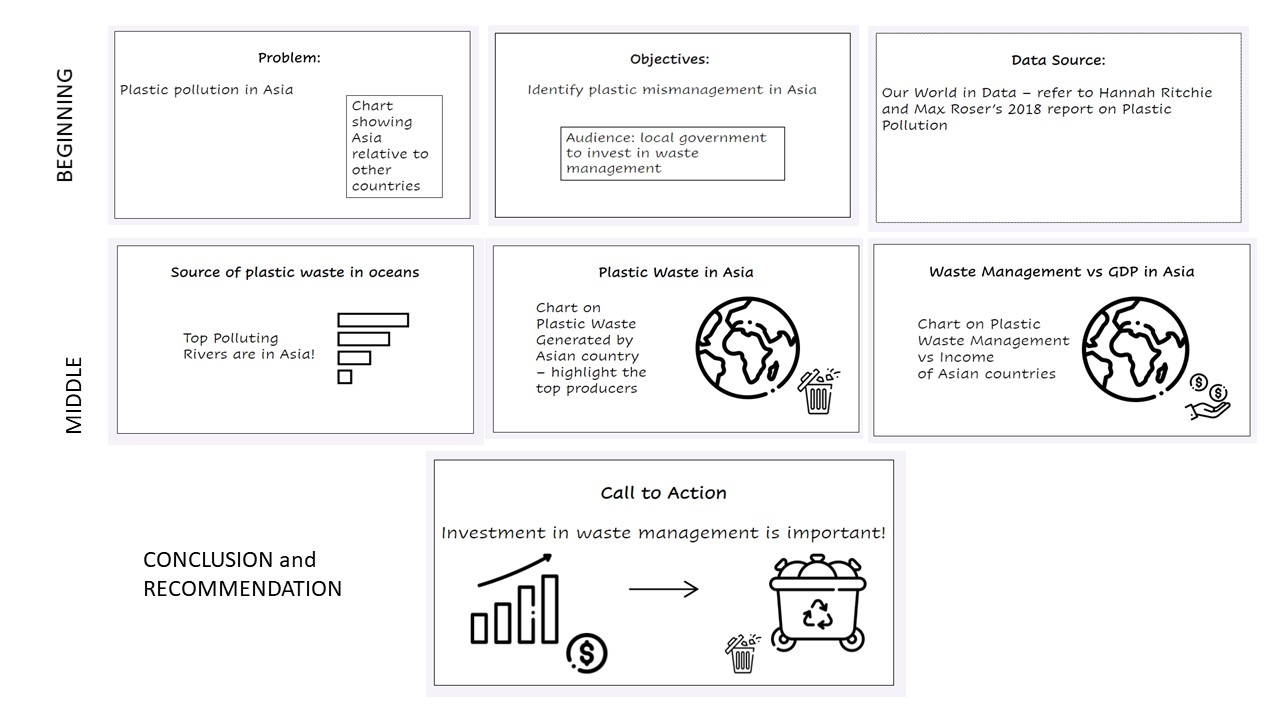

## Creating Visualizations

In order to create our visualizations, let's use the data science libraries we have learned before, i.e., `pandas`, `matplotlib` and `seaborn`.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Data for this notebook was compiled various sources from from the report on [Plastic Pollution from Our World in Data](https://ourworldindata.org/plastic-pollution).




## Plastic Pollution in Asia

The storyboard design shows that we will start by considering plastic pollution in Asia. So, we will need the data set specific to Asia.

First let's read in the data set of plastic waste by country, originally from [Jambeck (2015)](https://www.science.org/doi/10.1126/science.1260352)

In [ ]:
plastics = pd.read_csv("plastic_waste_by_country.csv")
plastics.info()

We find that there are 99 rows of data showing the amount of plastic waste, GDP and mismanaged plastic waste.
Let's take a look at the data:

In [ ]:
plastics.head()

According to this, we have plastic pollution data about different countries and continents. Based on our plan, we want to focus on Asia, so we might show a comparison between the continents in terms of plastic waste generated and mismanaged. 

To recalculate the total plastic waste generated and mismanaged per day, we multiply each row by the population estimate.

In [ ]:
# Calculate total plastic generated by country, per day

plastics['Total Plastic Waste Per Day'] = plastics['Per capita plastic waste (kg/person/day)']*plastics['Population (historical estimates)']
plastics['Total Mismanaged Plastic Per Day'] = plastics['Per capita mismanaged plastic waste']*plastics['Population (historical estimates)']
plastics.head()

## Where Asia Stands

We can create a bar plot to show that the continent with the highest total mismanaged plastic is Asia. In order to show the bar plots with the highest values, we have to sort the data.

First, calculate the total waste using `sum` attribute, then we will create a `DataFrame` with the data that we want to plot.

In [ ]:
# Calculate total waste for each continent

by_continent = plastics.groupby(['Continent']).sum()   # calculate for each continent
by_continent = by_continent[['Total Plastic Waste Per Day', 'Total Mismanaged Plastic Per Day']]   # only keep these two columns
by_continent = by_continent.sort_values(by='Total Plastic Waste Per Day', ascending=False)   # sort by highest total waste
by_continent = by_continent.reset_index()   # form back into a DataFrame
by_continent

Now, we can create the bar plots to compare total plastic waste generated and mismanaged by the continents.

In [ ]:
# Create subplots to compare 

fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True, figsize=(10,8))
sns.barplot(ax = ax1, data=by_continent, y='Continent', x='Total Plastic Waste Per Day', ci=None, palette='copper' )
sns.barplot(ax = ax2, data=by_continent, y='Continent', x='Total Mismanaged Plastic Per Day', ci=None, palette='copper')

ax1.set_ylabel('')
ax2.set_ylabel('')
ax2.set_xlim(right=300000000)
ax2.set_xticks([0,50000000,100000000,150000000, 200000000, 250000000, 300000000])
ax2.set_xticklabels(['0','50M', '100M','150M','200M', '250M', '300M'])

fig.suptitle('Asia is highest in total plastic waste generated and mismanaged ')
fig.supxlabel('Total in tonnes')
# use tight layout to make sure all the labels fit within the figure
plt.tight_layout()
fig.savefig("AsiaWaste.jpg")
plt.show()

## Source of Plastic Waste in Oceans

Next, we want to highlight that plastic waste in oceans come from rivers and the top polluting rivers are in Asia.

Data on the amount of plastic emitted to rivers is also available, originally attributed to [Lebreton, L. C., Van der Zwet, J., Damsteeg, J. W., Slat, B., Andrady, A., & Reisser, J. (2017). River plastic emissions to the world’s oceans. Nature Communications, 8, 15611.](https://www.nature.com/articles/ncomms15611)

Let's read in this data set too.

In [ ]:
# Data about top polluting rivers

rivers = pd.read_csv("plastic-top-20-rivers.csv")
rivers

### Top Polluting Regions 

Let's show that the Asian region is the highest contributor for plastic waste from rivers to ocean, by selecting only the data where the `Type` value is 'Region'.

In [ ]:
# Get the emissions for 'Type' 'Region' only

emission_by_region = rivers[rivers['Type']=='Region'].sort_values(by='Plastic mass input from rivers (tonnes)')
emission_by_region

Using this data, we can create a bar plot to show the amount of plastic waste emitted by rivers. 
The data from the Australia-Pacific region is very small in comparison, so it does not show up on the plot. 
To emphasize, we can add the amount label.

In [ ]:
# Create a plot with suitable figure size for saving

fig, ax = plt.subplots(figsize=(8, 6))
hbars = ax.barh(emission_by_region['Entity'], emission_by_region['Plastic mass input from rivers (tonnes)'], color="b")
ax.set_xlim(right=1700000)   # set the x axis limit
ax.set_xlabel("Plastic input from rivers, tonnes")
ax.bar_label(hbars, fmt = "%d tonnes")   # label the values

# Label the x-axis so that it is not in scientific notation 
ax.set_xticks([0, 500000, 1000000, 1500000])
ax.set_xticklabels(['0', '0.5M', '1.0M', '1.5M'])

# Add titles to describe this plot, setting X-axis position so that it is left aligned
fig.suptitle("Global River Plastics 2015", x=0.17, fontweight="bold")
ax.set_title("Asia has highest input of plastic waste from rivers into oceans ", x=0.14)

# Use tight layout to ensure all the labels fit within the figure
plt.tight_layout()
fig.savefig("RegionalRivers.jpg")
plt.show()

### Top Polluting Rivers

Let's show the list of the river names to emphasize that they are mostly in Asia. 

In [ ]:
# Select rivers and sort

by_river = rivers[rivers['Type']=='River'].sort_values(by='Plastic mass input from rivers (tonnes)')
by_river = by_river.tail(15)   # only choose 15 of the top polluting
by_river

In [ ]:
# Create similar plot as above 

fig, ax = plt.subplots(figsize=(10, 5))
hbars = ax.barh(by_river['Entity'], by_river['Plastic mass input from rivers (tonnes)'], color="b")
ax.set_xscale("linear")
ax.set_xlim(right=400000)
ax.set_xticks([0, 100000, 200000, 300000, 400000])
ax.set_xticklabels(['0', '100', '200', '300', '400'])
ax.set_xlabel("Plastic mass input into oceans, '000 tonnes")
fig.suptitle("Global River Plastics 2015 By River", fontweight="bold", x=0.18)
ax.set_title("Most of the top rivers with with plastic waste are in Asia", x=-0.42)

plt.tight_layout()
fig.savefig("TopRivers.jpg")
plt.show()

## Top Producers of Plastic Waste in Asia

Now, we can zoom in on which countries generate and mismanage the plastic waste in Asia. First, we filter the data to only select the Asian countries.

In [ ]:
# Filter to select only Asian countries

asia = plastics[plastics['Continent']=='Asia']
asia

### Top Asian Countries with Mismanaged Waste

We can quickly identify the top countries by creating a scatter plot of mismanaged vs generated plastic waste. The points with higher values of mismanaged waste can be clearly seen, and we can also label the points with the country names. As there are 95 countries, we can create a list containing specific countries to label.

To emphasize the value, We can also set the size of the point according to the amount of mismanaged waste.

In [ ]:
# Create scatter plot where the size of the point corresponds to 365 days * waste mismanaged

fig, ax = plt.subplots(figsize=(8, 5))
scatter = ax.scatter(asia['Per capita plastic waste (kg/person/day)'], asia['Per capita mismanaged plastic waste'], 
                     c='teal', s=365*asia['Per capita mismanaged plastic waste'])

# Find specific countries to be labelled at the points x,y 
for i in range(len(asia)):
    if asia.iloc[i, 0] in {'Indonesia', 'Kuwait', 'Malaysia', 'Singapore', 'China', 'India', 'Philippines', 'Sri Lanka', 'Maldives'}:
        ax.text(x=asia.iloc[i, 3]+0.01, y=asia.iloc[i, 6], s=asia.iloc[i,0])   # s is the string to display   
        
# Labels        
ax.set_xlabel(asia.columns[3])
ax.set_ylabel(asia.columns[6]+'\n(kg/person/day)')

# Specify the legend should show the size of the markers
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6, color='teal')
legend2 = ax.legend(handles, labels, loc="upper right", title="Estimated\nMismanaged\nWaste\n(kg/person/year)")

# Figure titles
ax.set_title("Sri Lanka, Maldives and Malaysia have highest mismanaged plastic waste per person.", x=0.48)
ax.set_xlim(0, 0.8)
ax.set_ylim(0, 0.4)
fig.suptitle("Mismanaged vs Generated Plastic Waste Per Capita", x=0.34, fontweight="bold")

# Save the figure
plt.tight_layout()
fig.savefig("MismanagedVsGenerated.jpg")
plt.show()

### Comparing Waste Management with GDP

Finally, we want to emphasize that countries with higher GDP per capita are usually better at managing their waste, but as countries' economy increase, waste management should be a priority. 

We will create the same plot, but with the GDP per capita to compare against the mismanaged waste per capita. 

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))

scatter = ax.scatter(asia['GDP per capita, PPP (constant 2017 international $)'], asia['Per capita mismanaged plastic waste'], c='b', alpha=0.5, s=365*asia['Per capita mismanaged plastic waste'])
for i in range(len(asia)):
    if asia.iloc[i,0] in {'Indonesia', 'Kuwait', 'Malaysia', 'Singapore', 'China', 'India', 'Philippines', 'Sri Lanka', 'Maldives'}:
        ax.text(asia.iloc[i, 4]+2000, asia.iloc[i, 6], asia.iloc[i, 0])
ax.set_xlabel(asia.columns[4])
ax.set_ylabel(asia.columns[6]+' (kg/person/day)')
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6, color='b')
ax.set_ylim(0, 0.4)
legend2 = ax.legend(handles, labels, loc="upper right", title="Estimated\nMismanaged\nWaste\n(kg/person/year)")
fig.suptitle("Mismanaged Plastic Waste by GDP per capita", x=0.315, fontweight="bold")
ax.set_title("Increase in GDP should result in better waste management", x=0.3)

plt.tight_layout()
fig.savefig("MismanagedvsGDP.jpg")
plt.show()

## Compiling the Report

Since we have saved all the figures in `jpg` format, you should be able to retrieve the files and use them in the data story.
Now, it's your turn! Consider the story that you want to tell and design the storyboard to present your own data story.